# San Francisco Crime Maps

In [21]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [22]:
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [23]:
# define the world map
world_map = folium.Map()

# display world map
world_map

In [24]:
# define the world map centered around Canada with a low zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4)

# display world map
world_map

In [25]:
# define the world map centered around Canada with a higher zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=8)

# display world map
world_map

In [26]:
### type your answer here
mexico_map=folium.Map( location =[23.6345, -102.5528],zoom_start=4)
mexico_map

### A. Stamen Toner Maps

These are high-contrast B+W (black and white) maps. They are perfect for data mashups and exploring river meanders and coastal zones. 

In [27]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Toner')

# display map
world_map

### B. Stamen Terrain Maps

These are maps that feature hill shading and natural vegetation colors. They showcase advanced labeling and linework generalization of dual-carriageway roads.

In [28]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Terrain')

# display map
world_map

### C. Mapbox Bright Maps

These are maps that quite similar to the default style, except that the borders are not visible with a low zoom level. Furthermore, unlike the default style where country names are displayed in each country's native language, *Mapbox Bright* style displays all country names in English.

In [29]:
# create a world map with a Mapbox Bright style.
#world_map = folium.Map(tiles='Mapbox Bright')
# display the map
#world_map
print("Mapbox bright will not work because leaflet removed the tile")

Mapbox bright will not work because leaflet removed the tile


In [30]:
### type your answer here
mexico_map = folium.Map( location = [23.6345, -102.5528], zoom_start=6, tiles='Stamen Terrain')
mexico_map

# Maps with Markers <a id="6"></a>


Let's download and import the data on police department incidents using *pandas* `read_csv()` method.

Download the dataset and read it into a *pandas* dataframe:

In [31]:
df_incidents = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


Let's take a look at the first five items in our dataset.

In [32]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


So each row consists of 13 features:
> 1. **IncidntNum**: Incident Number
> 2. **Category**: Category of crime or incident
> 3. **Descript**: Description of the crime or incident
> 4. **DayOfWeek**: The day of week on which the incident occurred
> 5. **Date**: The Date on which the incident occurred
> 6. **Time**: The time of day on which the incident occurred
> 7. **PdDistrict**: The police department district
> 8. **Resolution**: The resolution of the crime in terms whether the perpetrator was arrested or not
> 9. **Address**: The closest address to where the incident took place
> 10. **X**: The longitude value of the crime location 
> 11. **Y**: The latitude value of the crime location
> 12. **Location**: A tuple of the latitude and the longitude values
> 13. **PdId**: The police department ID

Let's find out how many entries there are in our dataset.

In [33]:
df_incidents.shape

(150500, 13)

So the dataframe consists of 150,500 crimes, which took place in the year 2016. In order to reduce computational cost, let's just work with the first 100 incidents in this dataset.

In [34]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

Let's confirm that our dataframe now consists only of 100 crimes.

In [35]:
df_incidents.shape

(100, 13)

Now that we reduced the data a little bit, let's visualize where these crimes took place in the city of San Francisco. We will use the default style and we will initialize the zoom level to 12. 

In [36]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [37]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

Now let's superimpose the locations of the crimes onto the map. The way to do that in **Folium** is to create a *feature group* with its own features and style and then add it to the sanfran_map.

In [38]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

You can also add some pop-up text that would get displayed when you hover over a marker. Let's make each marker display the category of the crime when hovered over.

In [40]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

In [42]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

In [43]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

In [44]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/coursera/Topic_Survey_Assignment.csv',
                index_col=0)
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [45]:
df.sort_values(['Very interested'], ascending=False, inplace=True)
df_sorted_values = np.round((df/2233)*100,2)
df_sorted_values

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


In [46]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

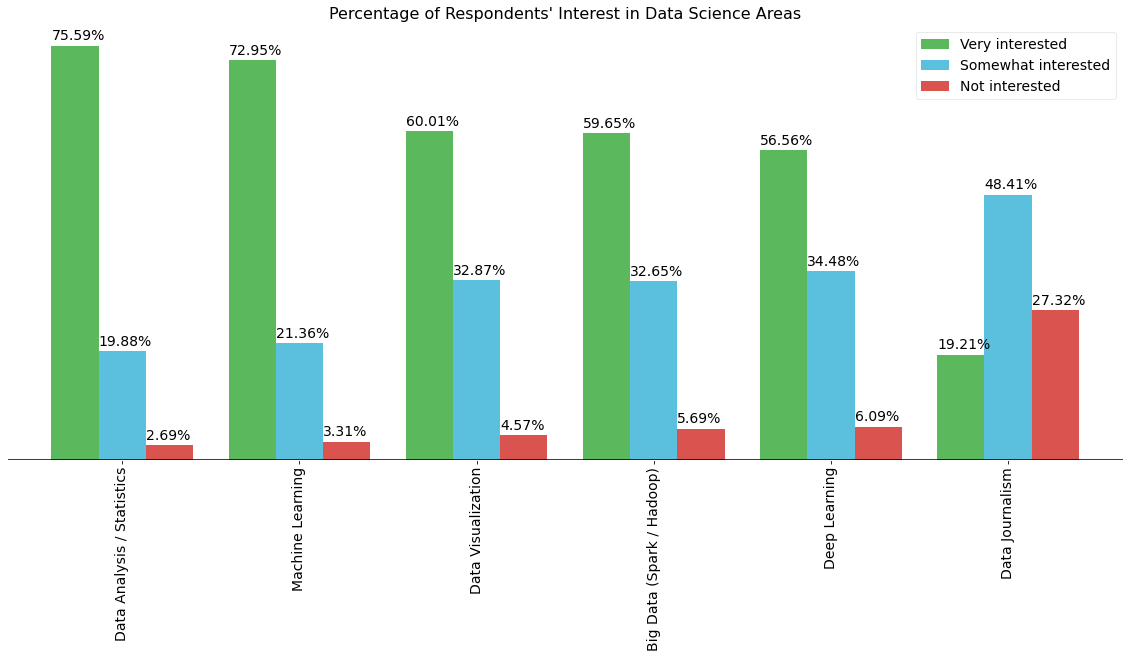

In [47]:
ax = df_sorted_values.plot(kind='bar',
            figsize=(20,8),
            width=0.8,
            color=['#5cb85c','#5bc0de','#d9534f'])

#plot values
ax.set_facecolor('white') # background color = white
ax.tick_params(axis='x', colors='black', labelsize=14) # display x axis with size and color
ax.axhline(0, color='black') # draw the x axis line
ax.legend(fontsize=14, facecolor='white') # display legend background color = white and fontsize
ax.set_title("Percentage of Respondents' Interest in Data Science Areas", fontsize = 16)
ax.tick_params(top=False, left=False, right=False, labelleft=False) # remove top,left,right and left label


for p in ax.patches:   #display the percentages above the bars
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}%'.format(height), (x, y + height + 1),fontsize=14)

In [48]:
crime_df=pd.read_csv('https://cocl.us/sanfran_crime_dataset')
crime_df.head(5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [49]:
crime_df.rename(columns={'PdDistrict':'Neighborhood'}, inplace=True)
crime_data = crime_df.groupby(['Neighborhood']).size().reset_index(name='Count')
crime_data

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [50]:
import folium
print('Installed Folium')

Installed Folium


In [51]:
# download the map of sanfranciso
!wget https://cocl.us/sanfran_geojson -O sanfran_geo.json

--2021-09-16 17:20:03--  https://cocl.us/sanfran_geojson
Resolving cocl.us (cocl.us)... 150.239.82.224, 150.239.80.14
Connecting to cocl.us (cocl.us)|150.239.82.224|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.box.com/shared/static/9luw8hp6klzopv2p9zg11uy2y0fmzrr5.geojson [following]
--2021-09-16 17:20:04--  https://ibm.box.com/shared/static/9luw8hp6klzopv2p9zg11uy2y0fmzrr5.geojson
Resolving ibm.box.com (ibm.box.com)... 185.235.236.197
Connecting to ibm.box.com (ibm.box.com)|185.235.236.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/9luw8hp6klzopv2p9zg11uy2y0fmzrr5.geojson [following]
--2021-09-16 17:20:04--  https://ibm.box.com/public/static/9luw8hp6klzopv2p9zg11uy2y0fmzrr5.geojson
Reusing existing connection to ibm.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/public/static/9luw8hp6klzopv2p9zg11uy2y0fmz

In [52]:
# Ready the map
lat = 37.7749
long = -122.4194

sanfran_map= folium.Map(location=[lat,long], zoom_start=12)
sanfran_map

In [53]:
# Plot the choropleth map
san = r'sanfran_geo.json'

sanfran_map.choropleth(
    geo_data=san,
    data=crime_data,
    columns=['Neighborhood','Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco',
    reset= True
)
sanfran_map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
